# IL6 analysis for a particular sample

An example demonstrating:

With an sample ID (for example, INCOV002-BL, from a patient in the ICU), calculate a mean value on the feature (IL6) value, which can be extracted from the transcriptomics feature data value file.

To do:
1. find the samples from the patients in the ICU and the patients not in the ICU
2. perform a differential expression analysis statistical difference for example t-test
3. Find the genes and proteins in WikiPathways that are in this pathway. How to get genes and proteins in the IL6 pathway?
(sparql endpoint, check wikipathway endpoint to identify genes interested , IL6 engaged, output a list of genes)

4. find the right features for these genes and proteins in transcriptomics and the proteomics dataset
We use IL6 as an example, do we need other features?


Note: the conda environment py36isa can be created as described here: https://gist.github.com/niehues/2e968e222489692f281d8361045766b0

In [1]:
# import functions from functions.py
import sys
sys.path.append(".")
from functions import *

    
SampleID_CovidAndICU
{"INCOV002" "INCOV003" "INCOV008" "INCOV013" "INCOV020" "INCOV022" "INCOV025" "INCOV026" "INCOV029" "INCOV031" "INCOV032" "INCOV035" "INCOV047" #"INCOV048" "INCOV051" "INCOV053" "INCOV055" "INCOV070" "INCOV071" "INCOV072" "INCOV075" "INCOV080" "INCOV086" "INCOV087" "INCOV096" "INCOV106" "INCOV111" #"INCOV115" "INCOV130" "INCOV137" "INCOV142" "INCOV147"}
    
SampleID_NonCovidNonICU
{"Healthy_1053BW" "Healthy_3126BW" "Healthy_3577BW" "Healthy_3577BW" "Healthy_6130BW" "Healthy_1193BW" "Healthy_2773BW" "Healthy_2982BW" "Healthy_3283BW" "Healthy_5046BW" "Healthy_7541BW" "Healthy_BP0219101" "Healthy_BP0319250" "Healthy_BP05191345" "Healthy_BP08191115" }

SampleID_CovidNonICU
{
##Sample ids who were covid diagnosed and but not in ICU,  192
"INCOV001-BL", "INCOV001-AC", "INCOV004-BL", "INCOV004-AC", "INCOV005-BL", "INCOV005-AC", "INCOV006-BL", "INCOV006-AC", "INCOV007-BL", "INCOV007-AC", "INCOV009-BL", "INCOV009-AC", "INCOV010-BL", "INCOV010-AC", "INCOV011-BL", "INCOV011-AC", "INCOV012-BL", "INCOV012-AC", "INCOV014-BL", "INCOV015-BL", "INCOV015-AC", "INCOV016-BL", "INCOV016-AC", "INCOV017-AC", "INCOV017-BL", "INCOV018-BL", "INCOV018-AC", "INCOV019-BL", "INCOV019-AC", "INCOV023-BL", "INCOV023-AC", "INCOV024-BL", "INCOV024-AC", "INCOV027-AC", "INCOV027-BL", "INCOV028-BL", "INCOV028-AC", "INCOV030-BL", "INCOV030-AC", "INCOV033-AC", "INCOV033-BL", "INCOV034-BL", "INCOV034-AC", "INCOV036-BL", "INCOV036-AC", "INCOV039-BL", "INCOV039-AC", "INCOV040-AC", "INCOV040-BL", "INCOV041-AC", "INCOV041-BL", "INCOV042-AC", "INCOV042-BL", "INCOV043-BL", "INCOV043-AC", "INCOV044-BL", "INCOV044-AC", "INCOV045-AC", "INCOV045-BL", "INCOV049-AC", "INCOV049-BL", "INCOV050-AC", "INCOV050-BL", "INCOV052-BL", "INCOV052-AC", "INCOV056-BL", "INCOV056-AC", "INCOV057-BL", "INCOV057-AC", "INCOV058-BL", "INCOV058-AC", "INCOV059-BL", "INCOV059-AC", "INCOV060-BL", "INCOV060-AC", "INCOV061-BL", "INCOV061-AC", "INCOV062-BL", "INCOV062-AC", "INCOV063-BL", "INCOV063-AC", "INCOV066-BL", "INCOV066-AC", "INCOV067-BL", "INCOV067-AC", "INCOV068-BL", "INCOV068-AC", "INCOV069-BL", "INCOV069-AC", "INCOV073-BL", "INCOV073-AC", "INCOV074-BL", "INCOV074-AC", "INCOV076-BL", "INCOV076-AC", "INCOV077-BL", "INCOV077-AC", "INCOV078-BL", "INCOV078-AC", "INCOV079-BL", "INCOV079-AC", "INCOV081-BL", "INCOV081-AC", "INCOV082-BL", "INCOV082-AC", "INCOV083-BL", "INCOV083-AC", "INCOV088-BL", "INCOV088-AC", "INCOV090-BL", "INCOV090-AC", "INCOV091-BL", "INCOV091-AC", "INCOV092-BL", "INCOV092-AC", "INCOV093-BL", "INCOV093-AC", "INCOV094-BL", "INCOV094-AC", "INCOV097-BL", "INCOV097-AC", "INCOV098-BL", "INCOV098-AC", "INCOV100-BL", "INCOV100-AC", "INCOV101-BL", "INCOV101-AC", "INCOV102-BL", "INCOV102-AC", "INCOV103-BL", "INCOV103-AC", "INCOV104-BL", "INCOV104-AC", "INCOV105-BL", "INCOV105-AC", "INCOV107-BL", "INCOV107-AC", "INCOV108-BL", "INCOV108-AC", "INCOV109-BL", "INCOV109-AC", "INCOV110-BL", "INCOV110-AC", "INCOV112-BL", "INCOV112-AC", "INCOV113-BL", "INCOV113-AC", "INCOV114-BL", "INCOV114-AC", "INCOV116-BL", "INCOV116-AC", "INCOV117-BL", "INCOV117-AC", "INCOV119-BL", "INCOV119-AC", "INCOV120-BL", "INCOV120-AC", "INCOV121-BL", "INCOV121-AC", "INCOV122-BL", "INCOV122-AC", "INCOV123-BL", "INCOV123-AC", "INCOV124-BL", "INCOV124-AC", "INCOV125-BL", "INCOV125-AC", "INCOV126-BL", "INCOV126-AC", "INCOV127-BL", "INCOV127-AC", "INCOV128-BL", "INCOV128-AC", "INCOV129-BL", "INCOV131-BL", "INCOV131-AC", "INCOV132-BL", "INCOV132-AC", "INCOV133-BL", "INCOV133-AC", "INCOV134-BL", "INCOV134-AC", "INCOV135-BL", "INCOV135-AC", "INCOV136-BL", "INCOV136-AC", "INCOV141-BL", "INCOV141-AC", "INCOV144-BL", "INCOV144-AC", "INCOV145-BL", "INCOV145-AC"
}


## Read transcriptomics data file

In [2]:
transcriptomics_feature_data = "../../data/Su_2020_FAIR/transcriptomics/transcriptomics_Su_2020_feature-data.csv"
df = read_omics_data(transcriptomics_feature_data)
print(df.shape)
df.iloc[:4,:10]

(18318, 143)


,INCOV100-BL,INCOV101-BL,INCOV010-BL,INCOV102-BL,INCOV103-BL,INCOV104-BL,INCOV105-BL,Healthy_1053BW,INCOV106-BL,INCOV107-BL
feature.name,,,,,,,,,,
A1BG,451.83500,883.4440,4707.210,491.6960,359.86000,696.2390,223.1980,2259.4000,621.9800,426.68400
A1BG-AS1,33.46420,112.8520,597.616,73.7626,22.45330,151.2720,12.5845,196.0360,79.7114,62.61120
A2M,5.53521,0.0000,28.607,0.0000,6.58922,0.0000,0.0000,0.0000,12.1686,6.82542
A2M-AS1,11.20350,74.8691,480.155,23.8664,6.21163,31.9432,24.5981,75.7514,54.5989,55.63960


## Read transcriptomics feature metadata file

In [3]:
transcriptomics_feature_metadata_path = "../../data/Su_2020_FAIR/transcriptomics/transcriptomics_Su_2020_feature-metadata.csv"
transcriptomics_feature_metadata = read_omics_data(transcriptomics_feature_metadata_path)
print(transcriptomics_feature_metadata.shape)
transcriptomics_feature_metadata

(18318, 3)


,database.ID,database,database.version
feature.name,,,
A1BG,NM_130786,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213
A1BG-AS1,NR_015380,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213
A2M,NM_000014,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213
A2M-AS1,NR_026971,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213
A2ML1,NM_001282424,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213
...,...,...,...
ZXDC,NM_001040653,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213
ZYG11A,NM_001004339,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213
ZYG11B,NM_024646,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213


## Create column with feature PID's

In [4]:
create_feature_PID(transcriptomics_feature_metadata)

,database.ID,database,database.version,PID
feature.name,,,,
A1BG,NM_130786,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213,https://www.ncbi.nlm.nih.gov/nuccore/NM_130786
A1BG-AS1,NR_015380,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213,https://www.ncbi.nlm.nih.gov/nuccore/NR_015380
A2M,NM_000014,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213,https://www.ncbi.nlm.nih.gov/nuccore/NM_000014
A2M-AS1,NR_026971,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213,https://www.ncbi.nlm.nih.gov/nuccore/NR_026971
A2ML1,NM_001282424,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213,https://www.ncbi.nlm.nih.gov/nuccore/NM_001282424
...,...,...,...,...
ZXDC,NM_001040653,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213,https://www.ncbi.nlm.nih.gov/nuccore/NM_001040653
ZYG11A,NM_001004339,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213,https://www.ncbi.nlm.nih.gov/nuccore/NM_001004339
ZYG11B,NM_024646,https://www.ncbi.nlm.nih.gov/nuccore/,RefSeq Release 213,https://www.ncbi.nlm.nih.gov/nuccore/NM_024646


## Subset omics data on features and/or sample IDs

In [5]:
features_list = ['IL6'] #, 'IL6R', 'IL6R-AS1','IL6ST']

#SampleID_CoviNonICU, only -BL, not -AC
sample_list = ["INCOV001-BL", "INCOV004-BL", "INCOV005-BL",  "INCOV006-BL", "INCOV007-BL",  "INCOV009-BL",  "INCOV010-BL", "INCOV011-BL",  "INCOV012-BL", "INCOV014-BL", "INCOV015-BL", "INCOV016-BL",  "INCOV017-BL", "INCOV018-BL", "INCOV019-BL", "INCOV023-BL",  "INCOV024-BL",  "INCOV027-BL", "INCOV028-BL", 
               "INCOV030-BL", "INCOV033-BL", "INCOV034-BL", "INCOV036-BL", "INCOV039-BL", "INCOV040-BL", "INCOV041-BL", "INCOV042-BL", "INCOV043-BL", 
               "INCOV044-BL", "INCOV045-BL", "INCOV049-BL", "INCOV050-BL", "INCOV052-BL", "INCOV056-BL", "INCOV057-BL", "INCOV058-BL", "INCOV059-BL", 
             "INCOV060-BL", "INCOV061-BL", "INCOV062-BL", "INCOV063-BL", "INCOV066-BL", "INCOV067-BL", "INCOV068-BL", "INCOV069-BL", "INCOV073-BL", 
               "INCOV074-BL", "INCOV076-BL", "INCOV077-BL", "INCOV078-BL", "INCOV079-BL", "INCOV081-BL", "INCOV082-BL", "INCOV083-BL", "INCOV088-BL", "INCOV090-BL", "INCOV091-BL",
             "INCOV092-BL", "INCOV093-BL",  "INCOV094-BL", "INCOV097-BL", "INCOV098-BL",  "INCOV100-BL", "INCOV101-BL", "INCOV102-BL", "INCOV103-BL",
               "INCOV104-BL", "INCOV105-BL", "INCOV107-BL", "INCOV108-BL", "INCOV109-BL", "INCOV110-BL", "INCOV112-BL", "INCOV113-BL", "INCOV114-BL", 
                "INCOV116-BL", "INCOV117-BL", "INCOV119-BL", "INCOV120-BL",  "INCOV121-BL",  "INCOV122-BL",  "INCOV123-BL", "INCOV124-BL", "INCOV125-BL",
               "INCOV126-BL",  "INCOV127-BL",  "INCOV128-BL", "INCOV129-BL", "INCOV131-BL",  "INCOV132-BL", "INCOV133-BL", "INCOV134-BL", "INCOV135-BL", 
                "INCOV136-BL", "INCOV141-BL",  "INCOV144-BL",  "INCOV145-BL"]

df_subset_IL6_CovidNonICU = subset_omics_data(df, feature_list=features_list, sample_list=sample_list)
df_subset_IL6_CovidNonICU

,INCOV001-BL,INCOV004-BL,INCOV005-BL,INCOV006-BL,INCOV007-BL,INCOV009-BL,INCOV010-BL,INCOV011-BL,INCOV012-BL,INCOV014-BL,...,INCOV129-BL,INCOV131-BL,INCOV132-BL,INCOV133-BL,INCOV134-BL,INCOV135-BL,INCOV136-BL,INCOV141-BL,INCOV144-BL,INCOV145-BL
feature.name,,,,,,,,,,,,,,,,,,,,,
IL6,102.67,10.8455,42.0354,28.6265,135.706,151.484,287.844,18.2813,28.2093,73.9573,...,6.29388,6.39421,0.0,12.3414,0.0,0.0,6.04219,5.10181,13.2166,6.25683


In [6]:
features_list = ['IL6'] #, 'IL6R', 'IL6R-AS1','IL6ST']

#SampleID_CovidAndICU, only -BL, no -AB
sample_list = ["INCOV002-BL","INCOV003-BL","INCOV008-BL","INCOV013-BL","INCOV020-BL","INCOV022-BL","INCOV025-BL","INCOV026-BL",
"INCOV029-BL","INCOV031-BL","INCOV032-BL","INCOV035-BL","INCOV047-BL","INCOV048-BL","INCOV051-BL","INCOV053-BL","INCOV055-BL",
"INCOV070-BL", "INCOV071-BL","INCOV072-BL","INCOV075-BL","INCOV080-BL","INCOV086-BL","INCOV087-BL","INCOV096-BL","INCOV106-BL",
"INCOV111-BL","INCOV115-BL","INCOV130-BL","INCOV137-BL","INCOV142-BL","INCOV147-BL"]

#["INCOV002-AC","INCOV003-AC","INCOV013-AC","INCOV020-AC","INCOV022-AC","INCOV025-AC","INCOV026-AC","INCOV029-AC","INCOV031-AC","INCOV032-AC"
#,"INCOV035-AC" ,"INCOV047-AC","INCOV051-AC" ,"INCOV053-AC","INCOV070-AC","INCOV071-AC","INCOV072-AC","INCOV075-AC","INCOV080-AC","INCOV086-AC","INCOV087-AC","INCOV096-AC"
#,"INCOV106-AC","INCOV111-AC","INCOV115-AC","INCOV130-AC","INCOV137-AC" ,"INCOV142-AC"]

df_subset_CovidICU = subset_omics_data(df, feature_list=features_list, sample_list=sample_list)
df_subset_CovidICU

,INCOV002-BL,INCOV003-BL,INCOV008-BL,INCOV013-BL,INCOV020-BL,INCOV022-BL,INCOV025-BL,INCOV026-BL,INCOV029-BL,INCOV031-BL,...,INCOV086-BL,INCOV087-BL,INCOV096-BL,INCOV106-BL,INCOV111-BL,INCOV115-BL,INCOV130-BL,INCOV137-BL,INCOV142-BL,INCOV147-BL
feature.name,,,,,,,,,,,,,,,,,,,,,
IL6,136.53,67.6968,29.362,57.0412,58.0053,46.9086,77.159,35.8988,153.778,105.182,...,22.9871,7.12176,6.41683,12.6566,24.836,7.17901,12.7952,6.16129,11.6388,0.0


In [7]:
features_list = ['IL6']#, 'IL6R', 'IL6R-AS1','IL6ST']

#SampleID, Healthy individual
sample_list = ["Healthy_1053BW", "Healthy_3126BW", "Healthy_3577BW", "Healthy_3577BW", "Healthy_6130BW", "Healthy_1193BW", "Healthy_2773BW", "Healthy_2982BW", "Healthy_3283BW", "Healthy_5046BW", "Healthy_7541BW", "Healthy_BP0219101", "Healthy_BP0319250", "Healthy_BP05191345", "Healthy_BP08191115"]

df_subset_healthy = subset_omics_data(df, feature_list=features_list, sample_list=sample_list)
df_subset_healthy

,Healthy_1053BW,Healthy_3126BW,Healthy_3577BW,Healthy_3577BW,Healthy_6130BW,Healthy_1193BW,Healthy_2773BW,Healthy_2982BW,Healthy_3283BW,Healthy_5046BW,Healthy_7541BW,Healthy_BP0219101,Healthy_BP0319250,Healthy_BP05191345,Healthy_BP08191115
feature.name,,,,,,,,,,,,,,,
IL6,12.1854,6.34024,0.0,0.0,6.54872,46.6209,0.0,62.0935,0.0,6.00117,5.64183,0.0,0.0,28.3773,6.65131


## Calculate mean for every feature

In [8]:
calculate_means(df_subset_IL6_CovidNonICU)

{'IL6': 31.66134041237113}

In [9]:
calculate_means(df_subset_CovidICU)

{'IL6': 36.706052812500005}

In [10]:
calculate_means(df_subset_healthy)

{'IL6': 12.030691333333332}

In [11]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


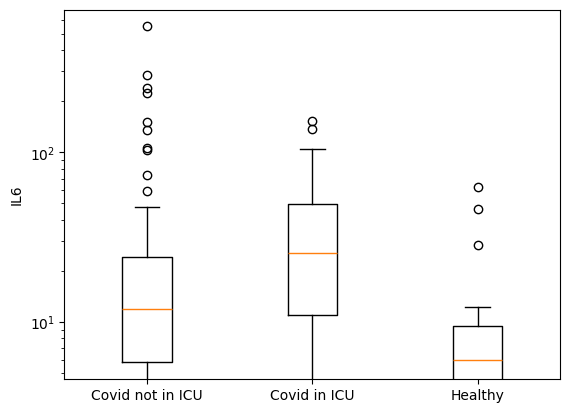

In [16]:
DF_list= list()

DF_list.extend(df_subset_IL6_CovidNonICU.values.tolist())
DF_list.extend(df_subset_CovidICU.values.tolist())
DF_list.extend(df_subset_healthy.values.tolist())


# Plot title, axes, and legend
#plt.title("")
#plt.xlabel("x-axis label")
plt.ylabel("IL6")
plt.yscale('log')
#plt.legend()
#DF_list 
plt.boxplot(DF_list,labels=["Covid not in ICU","Covid in ICU","Healthy"])
plt.show()


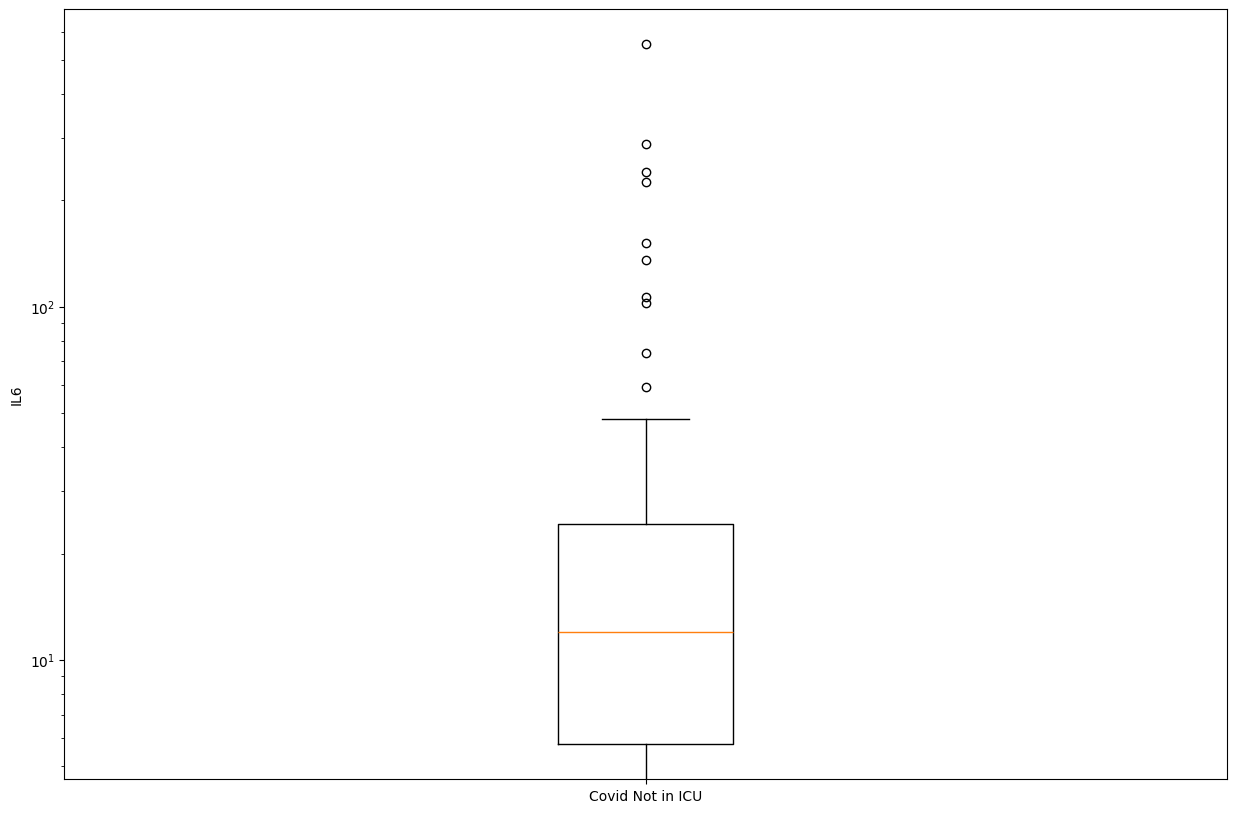

In [13]:
#df_subset_IL6_CovidNonICU

fig = plt.figure(figsize =(15, 10))
# Creating plot
plt.ylabel("IL6")
plt.yscale('log')
plt.boxplot(df_subset_IL6_CovidNonICU.T,labels=["Covid Not in ICU"])
 
# show plot
plt.show()



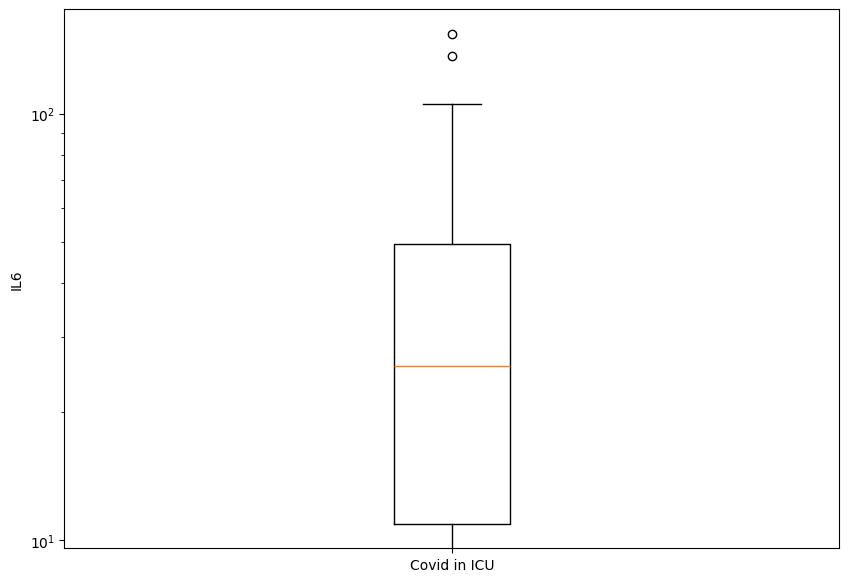

In [14]:
fig2 = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(df_subset_CovidICU.T, labels=["Covid in ICU"])
plt.ylabel("IL6") 
plt.yscale('log')
# show plot
plt.show()

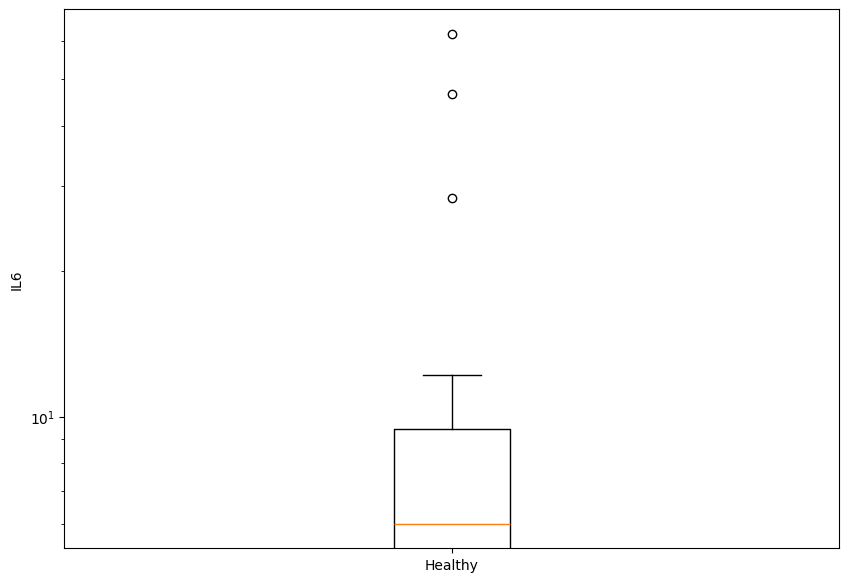

In [15]:
fig3 = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(df_subset_healthy.T, labels=["Healthy"])
plt.ylabel("IL6")
plt.yscale('log')
# show plot
plt.show()